In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mrjob as mr


### Homework 5

Copy this notebook. Rename it as: YOURNAME-HW4-mapreduce-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

Upload your completed jupyter notebook to elearning site as your homework submission. Do not put this notebook on your github.

Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. Extension of homework to to implement an TD-IDF algorithm  (see below)

Use the data/bible+shakes.nonpunc.txt file as the source of you analysis in this homework

##Homework 5.1
 A bigram is the combination of words.  Find the 10 most common bigrams from the text.  Order counts in the bigram combination for example "in the" is not the same bigram as "the in"



In [1]:
# %load code/bigrams.py
# Do not run this cell it is just displaying the content of the code

from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import heapq
WORD_RE = re.compile(r"[\w']+")
class bigrams(MRJob):
    def mapper(self, _, line):
        """
        """
        l = WORD_RE.findall(line.lower())
        for i in range(len(l)-1):  #generate bigrams
            yield [l[i],l[i+1]],1

    def reducer_sum(self, key, val):
        yield None,[sum(val),key]
        
    def reducer_top10(self,_,values): #we only need top 10
        for cnt,val in heapq.nlargest(10,values):
            yield cnt,val
            
    def steps(self):
        return [MRStep(mapper=self.mapper, reducer=self.reducer_sum),MRStep(reducer=self.reducer_top10)]       


if __name__ == '__main__':
    bigrams.run()


In [2]:
# -*- coding: utf-8 -*-
# Testing word frequency count

import os, sys
sys.path.append(os.path.join(os.getcwd(),"code"))
from bigrams import *
from mrjob.job import MRJob
'''
This is a simple wrapper that runs mrjob MapReduce jobs, the inputs are:
MRJobClass - the class of the job to be run
argsArr - an array of strings to be used when creating the MRJob.
@author: Peter Harrington  if you have any questions: peter.b.harrington@gmail.com
'''
def runJob(MRJobClass, argsArr, loc='local'):
    if loc == 'emr': 
        argsArr.extend(['-r', 'emr'])
    print "starting %s job on %s" % (MRJobClass.__name__, loc)
    mrJob = MRJobClass(args=argsArr)
    runner = mrJob.make_runner()
    runner.run()
    print "finished %s job" % MRJobClass.__name__
    return mrJob, runner
    
def runParallelJob(MRJobClass, argsArr):            #TO DO: add threading to allow jobs to run in 
    pass                                                #parallel 
    #launch a new thread
    #call runJob(MRJobClass, argsArr) on the new thread

if __name__ == '__main__':
# pass in file from outside
#    MRWordFrequencyCount.run()
#setup file here
    mr_job, runner = runJob(bigrams,[os.path.join(os.path.join(os.getcwd(),"data"),"bible+shakes.nopunc.txt")],"local")
    print "top 10 bigrams and their counts:"
    for line in runner.stream_output(): 
        key, value = mr_job.parse_output_line(line)
        print "%s: %s "%(value,key)


starting bigrams job on local


No handlers could be found for logger "mrjob.conf"


finished bigrams job
top 10 bigrams and their counts:
of the: 13037 
and the: 7034 
the lord: 7017 
in the: 6738 
to the: 3799 
i will: 3470 
and he: 3020 
shall be: 3013 
all the: 2714 
i have: 2666 


## Homework 5.2
Now do the same analysis but make the word order not count "in the" == "the in".  Find the 10 most common ordered bigrams from the alice text.  
 

In [1]:
# %load code/bigrams2.py
# Do not run this cell it is just displaying the content of the code
from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import heapq
WORD_RE = re.compile(r"[\w']+")
class bigrams2(MRJob):
    def mapper(self, _, line):
        """
        """
        l = WORD_RE.findall(line.lower())
        for i in range(len(l)-1): #use set here
            yield set([l[i],l[i+1]]),1

    def reducer_sum(self, key, val):
        yield None,[sum(val),key]
        
    def reducer_top10(self,_,values): #we only need top 10
        for cnt,val in heapq.nlargest(10,values):
            yield cnt,val
            
    def steps(self):
        return [MRStep(mapper=self.mapper, reducer=self.reducer_sum),MRStep(reducer=self.reducer_top10)]       


if __name__ == '__main__':
    bigrams2.run()



In [3]:
# -*- coding: utf-8 -*-
# Testing word frequency count

import os, sys
sys.path.append(os.path.join(os.getcwd(),"code"))
from bigrams2 import *
from mrjob.job import MRJob
'''
This is a simple wrapper that runs mrjob MapReduce jobs, the inputs are:
MRJobClass - the class of the job to be run
argsArr - an array of strings to be used when creating the MRJob.
@author: Peter Harrington  if you have any questions: peter.b.harrington@gmail.com
'''
def runJob(MRJobClass, argsArr, loc='local'):
    if loc == 'emr': 
        argsArr.extend(['-r', 'emr'])
    print "starting %s job on %s" % (MRJobClass.__name__, loc)
    mrJob = MRJobClass(args=argsArr)
    runner = mrJob.make_runner()
    runner.run()
    print "finished %s job" % MRJobClass.__name__
    return mrJob, runner
    
def runParallelJob(MRJobClass, argsArr):            #TO DO: add threading to allow jobs to run in 
    pass                                                #parallel 
    #launch a new thread
    #call runJob(MRJobClass, argsArr) on the new thread

if __name__ == '__main__':
# pass in file from outside
#    MRWordFrequencyCount.run()
#setup file here
    mr_job, runner = runJob(bigrams2,[os.path.join(os.path.join(os.getcwd(),"data"),"bible+shakes.nopunc.txt")],"local")
    Bigramdic=pd.Series([])
    print "top 10 bigrams and their counts:"
    for line in runner.stream_output(): 
        key, value = mr_job.parse_output_line(line)
        Bigramdic[value]=key
        print "%s: %s "%(value,key)

starting bigrams2 job on local
finished bigrams2 job
top 10 bigrams and their counts:
of the: 13037 
lord the: 7244 
and the: 7034 
in the: 6739 
i will: 4100 
the to: 3799 
and he: 3129 
have i: 3123 
be shall: 3015 
am i: 2881 


## Homework 5.3
A trigram are three word combintation.  Find the 10 most common ordered trigrams from the alice text.  Make it so that the order of the words do not count in the trigram combination for example "in the air" is the same trigram as "the air in" or "air in the"...


In [1]:
# %load code/trigrams.py
# Do not run this cell it is just displaying the content of the code
from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import heapq
WORD_RE = re.compile(r"[\w']+")
class trigrams(MRJob):
    def mapper(self, _, line):
        """
        """
        l = WORD_RE.findall(line.lower())
        for i in range(len(l)-2): #use set here
            yield set([l[i],l[i+1],l[i+2]]),1

    def reducer_sum(self, key, val):
        yield None,[sum(val),key]
        
    def reducer_top10(self,_,values): #we only need top 10
        for cnt,val in heapq.nlargest(10,values):
            yield cnt,val
            
    def steps(self):
        return [MRStep(mapper=self.mapper, reducer=self.reducer_sum),MRStep(reducer=self.reducer_top10)]       


if __name__ == '__main__':
    trigrams.run()


In [4]:
# -*- coding: utf-8 -*-
# Testing word frequency count

import os, sys
sys.path.append(os.path.join(os.getcwd(),"code"))
from trigrams import *
from mrjob.job import MRJob
'''
This is a simple wrapper that runs mrjob MapReduce jobs, the inputs are:
MRJobClass - the class of the job to be run
argsArr - an array of strings to be used when creating the MRJob.
@author: Peter Harrington  if you have any questions: peter.b.harrington@gmail.com
'''
def runJob(MRJobClass, argsArr, loc='local'):
    if loc == 'emr': 
        argsArr.extend(['-r', 'emr'])
    print "starting %s job on %s" % (MRJobClass.__name__, loc)
    mrJob = MRJobClass(args=argsArr)
    runner = mrJob.make_runner()
    runner.run()
    print "finished %s job" % MRJobClass.__name__
    return mrJob, runner
    
def runParallelJob(MRJobClass, argsArr):            #TO DO: add threading to allow jobs to run in 
    pass                                                #parallel 
    #launch a new thread
    #call runJob(MRJobClass, argsArr) on the new thread

if __name__ == '__main__':
# pass in file from outside
#    MRWordFrequencyCount.run()
#setup file here
    mr_job, runner = runJob(trigrams,[os.path.join(os.path.join(os.getcwd(),"data"),"bible+shakes.nopunc.txt")],"local")
    Trigramdic=pd.Series([])
    print "top 10 trigrams and their counts:"
    for line in runner.stream_output(): 
        key, value = mr_job.parse_output_line(line)
        Trigramdic[value]=key
        print "%s: %s "%(value,key)

starting trigrams job on local
finished trigrams job
top 10 trigrams and their counts:
lord of the: 2053 
children of the: 1794 
house of the: 1581 
of son the: 1523 
and lord the: 1187 
land of the: 1025 
lord saith the: 866 
of out the: 855 
and i will: 813 
of sons the: 762 


## Homework 5.4
Create graphs to explain the relationship of the frequency of monograms ( words ) to bigrams and trigam frequencies

In [1]:
# %load code/monograms.py
# Do not run this cell it is just displaying the content of the code
from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import heapq
WORD_RE = re.compile(r"[\w']+")
class monograms(MRJob):
    def mapper(self, _, line):
        """
        """
        l = WORD_RE.findall(line.lower())
        for i in range(len(l)): 
            yield l[i],1

    def reducer_sum(self, key, val):
        yield None,[sum(val),key]
        
    def reducer_top10(self,_,values): #we only need top 10
        for cnt,val in heapq.nlargest(10,values):
            yield cnt,val
            
    def steps(self):
        return [MRStep(mapper=self.mapper, reducer=self.reducer_sum),MRStep(reducer=self.reducer_top10)]       


if __name__ == '__main__':
    monograms.run()



starting monograms job on local
finished monograms job
top 10 Monograms and their counts:
the: 93739 
and: 79182 
of: 53121 
to: 33929 
i: 30240 
that: 24407 
in: 24350 
a: 23504 
my: 17312 
he: 17087 


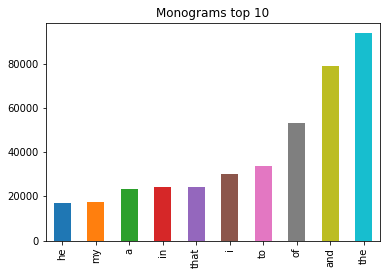

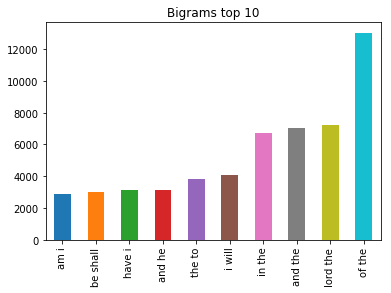

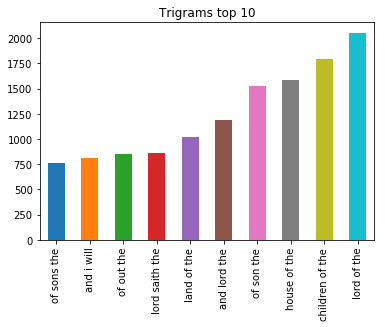

In [5]:
# -*- coding: utf-8 -*-
# Testing word frequency count

import os, sys
sys.path.append(os.path.join(os.getcwd(),"code"))
from monograms import *
from mrjob.job import MRJob
'''
This is a simple wrapper that runs mrjob MapReduce jobs, the inputs are:
MRJobClass - the class of the job to be run
argsArr - an array of strings to be used when creating the MRJob.
@author: Peter Harrington  if you have any questions: peter.b.harrington@gmail.com
'''
def runJob(MRJobClass, argsArr, loc='local'):
    if loc == 'emr': 
        argsArr.extend(['-r', 'emr'])
    print "starting %s job on %s" % (MRJobClass.__name__, loc)
    mrJob = MRJobClass(args=argsArr)
    runner = mrJob.make_runner()
    runner.run()
    print "finished %s job" % MRJobClass.__name__
    return mrJob, runner
    
def runParallelJob(MRJobClass, argsArr):            #TO DO: add threading to allow jobs to run in 
    pass                                                #parallel 
    #launch a new thread
    #call runJob(MRJobClass, argsArr) on the new thread

if __name__ == '__main__':
# pass in file from outside
#    MRWordFrequencyCount.run()
#setup file here
    mr_job, runner = runJob(monograms,[os.path.join(os.path.join(os.getcwd(),"data"),"bible+shakes.nopunc.txt")],"local")
    Monogramdic=pd.Series([])
    print "top 10 Monograms and their counts:"
    for line in runner.stream_output(): 
        key, value = mr_job.parse_output_line(line)
        Monogramdic[value]=key
        print "%s: %s "%(value,key)
    
  
    plt.figure(1)
    Monogramdic.sort_values().plot(kind='bar',title='Monograms top 10')
    
    plt.figure(2)
    Bigramdic.sort_values().plot(kind='bar',title='Bigrams top 10')
    
    plt.figure(3)
    Trigramdic.sort_values().plot(kind='bar',title='Trigrams top 10')
    
    

## For greater than a score of 3 
###  Create a TD - IDF implementation and 
### Analyze the following Sherlock Holmes book from Project Gutenberg text versions of :
The Adventures of Sherlock Holmes-  http://www.gutenberg.org/ebooks/1661.txt.utf-8

A Study in Scarlet - http://www.gutenberg.org/files/244/244-0.txt

The Hound of the Baskervilles - http://www.gutenberg.org/files/2852/2852-0.txt

The Return of Sherlock Holmes - http://www.gutenberg.org/files/108/108-0.txt

The Sign of the Four - http://www.gutenberg.org/ebooks/2097.txt.utf-8

### Display the scores for the top 20 highest frequencty terms and the relationship to the books



In [1]:
# %load code/tokencount.py
# Do not run this cell it is just displaying the content of the code
from mrjob.job import MRJob
import nltk
from nltk.corpus import stopwords

class tokencount(MRJob):
    def mapper(self, _, line):
        """
        """
        english_stopwords=stopwords.words('english')
        tx=nltk.word_tokenize(unicode(line.lower(),'utf-8'))#we need to change to unicode       
        for i in tx: #removing stoping words ,punctuation and words of length one
            if (len(i)>1) and (i not in english_stopwords) and i.isalnum():
                yield i,1

    def reducer(self, key, val):
        yield key,sum(val)
        

if __name__ == '__main__':
    tokencount.run()


In [9]:
# -*- coding: utf-8 -*-
# Testing word frequency count
import math
import os, sys
import nltk
nltk.download('stopwords')
nltk.download('punkt')
 
sys.path.append(os.path.join(os.getcwd(),"code"))
from tokencount import *
from mrjob.job import MRJob
'''
This is a simple wrapper that runs mrjob MapReduce jobs, the inputs are:
MRJobClass - the class of the job to be run
argsArr - an array of strings to be used when creating the MRJob.
@author: Peter Harrington  if you have any questions: peter.b.harrington@gmail.com
'''

def runJob(MRJobClass, argsArr, loc='local'):
    if loc == 'emr': 
        argsArr.extend(['-r', 'emr'])
    print "starting %s job on %s" % (MRJobClass.__name__, loc)
    mrJob = MRJobClass(args=argsArr)
    runner = mrJob.make_runner()
    runner.run()
    print "finished %s job" % MRJobClass.__name__
    return mrJob, runner
    
def runParallelJob(MRJobClass, argsArr):            #TO DO: add threading to allow jobs to run in 
    pass                                                #parallel 
    #launch a new thread
    #call runJob(MRJobClass, argsArr) on the new thread

if __name__ == '__main__':
# pass in file from outside
#    MRWordFrequencyCount.run()
#setup file here
    KeyD=pd.Series([])
    files=["pg1661.txt","244-0.txt","2852-0.txt","108-0.txt","pg2097.txt"]       
    Realnames=["The Adventures of Sherlock Holmes","A Study in Scarlet","The Hound of the Baskervilles","The Return of Sherlock Holmes","The Sign of the Four"]
    AllHist=[pd.Series([]) for i in range(len(files))]
    for i in range(len(files)):
        mr_job, runner = runJob(tokencount,[os.path.join(os.path.join(os.getcwd(),"data"),files[i])],"local")    
        for line in runner.stream_output(): 
            key, value = mr_job.parse_output_line(line)
            #print "%s: %s "%(key,value)
            AllHist[i][key]=value        
            if KeyD.get(key)==None:
                KeyD[key]=1
            else:
                KeyD[key]+=1
        AllHist[i]/=AllHist[i].sum()    #TD
        AllHist[i]=AllHist[i].sort_values(ascending=False) #TD in word frequency order    
    
    IDF=KeyD.apply(lambda x: math.log10(len(files)/float(x)))
    
    for i in range(len(files)):
        for j in AllHist[i].index:
            AllHist[i][j]*=IDF[j]      #TD-IDF in word freqency order
        Hscore=list(AllHist[i].sort_values(ascending=False).index) #word in TD-IDF score order   
        print "\n\n*****************************************************************************************************"
        print "For BOOK: %s"%(Realnames[i])
        print "the scores for the top 20 highest frequencty terms and their importance to the book(rank of their score, the smaller the more important):"
        for j in AllHist[i].index[:20]:
            print "%s: %f: %d"%(j,AllHist[i][j],Hscore.index(j)+1)
        print "\nAND for reference, the top 20 MOST IMPORTANT terms in this book are(ordered by scores):"
        for j in Hscore[:20]:
            print "%s: %f"%(j,AllHist[i][j])
        

    



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liximing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/liximing/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
starting tokencount job on local
finished tokencount job
starting tokencount job on local
finished tokencount job
starting tokencount job on local
finished tokencount job
starting tokencount job on local
finished tokencount job
starting tokencount job on local
finished tokencount job


*****************************************************************************************************
For BOOK: The Adventures of Sherlock Holmes
the scores for the top 20 highest frequencty terms and their importance to the book(rank of their score, the smaller the more important):
said: 0.000000: 7799
upon: 0.000000: 6278
holmes: 0.000000: 6277
one: 0.000000: 6276
would: 0.000000: 6275
man: 0.000000: 6274
could: 0.000000: 6273
little: 0.000000: 6